In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. Load the RGB image
img = cv2.imread(r"C:\Users\bbuser\Downloads\baboon.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

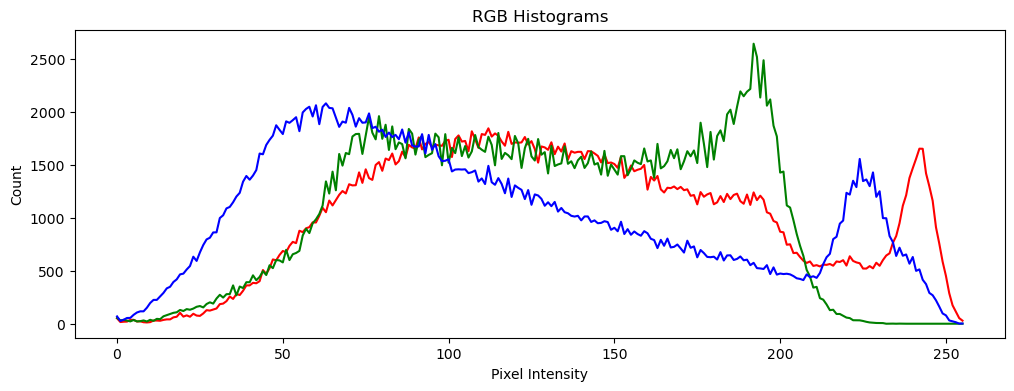

In [3]:

# 2. Create and display histograms for each color channel
colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 4))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.title("RGB Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


In [4]:
# 3. Apply intensity transformations (brightness & contrast)
brightness = 50   # increase brightness by adding 50
contrast = 1.3    # increase contrast by multiplying

bright_contrast_img = cv2.convertScaleAbs(img_rgb, alpha=contrast, beta=brightness)

In [5]:
# 4. Histogram equalization on each channel
b, g, r = cv2.split(img_rgb)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)
img_eq = cv2.merge((b_eq, g_eq, r_eq))

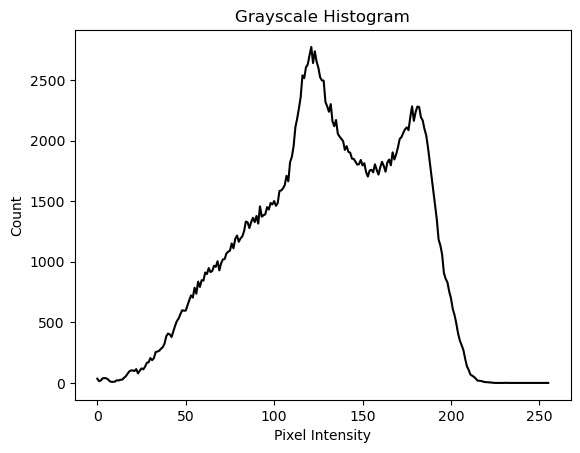

In [6]:
# 5. Convert to grayscale & create histogram
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist_gray, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()

In [7]:
# 6. Apply Otsu’s thresholding for segmentation
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

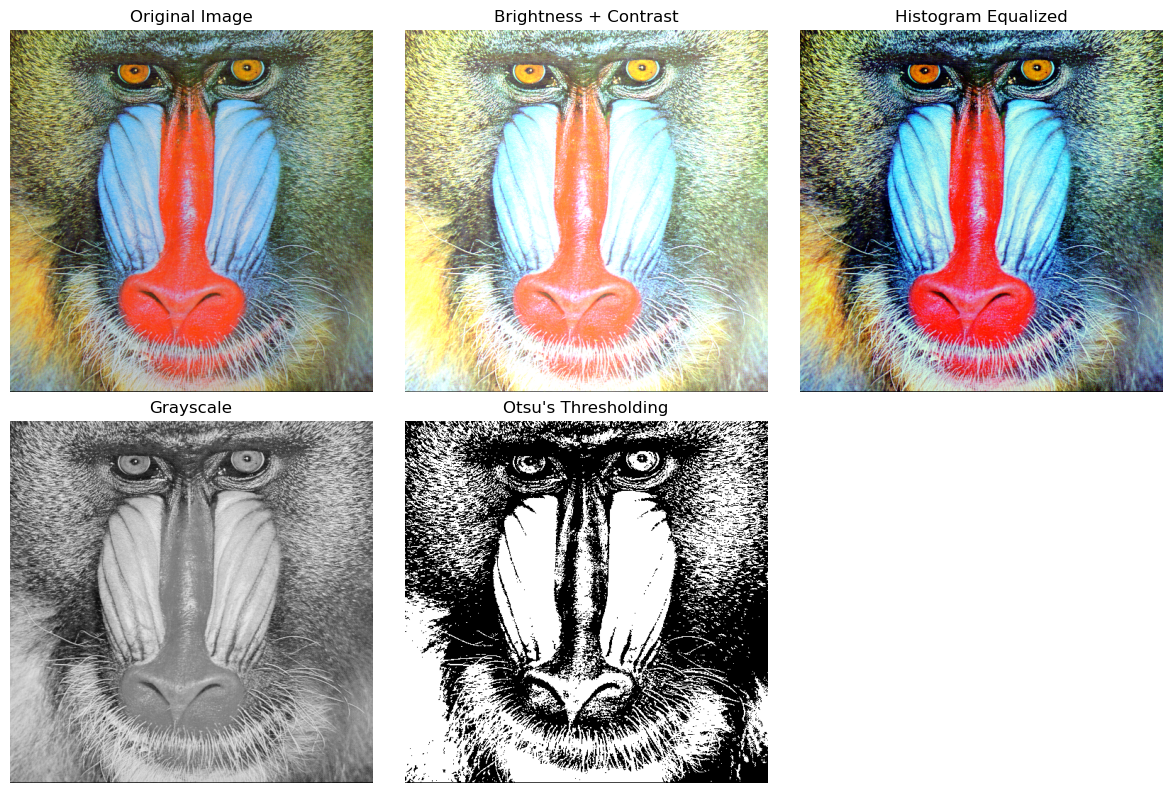

In [8]:
# 7. Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bright_contrast_img)
plt.title("Brightness + Contrast")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_eq)
plt.title("Histogram Equalized")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()
